# Library

In [1]:
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input
from tensorflow.keras.layers import Flatten, add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import math

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import describe, fe, scoring, deep_learning, visual

%reload_ext autoreload

2021-05-30 21:45:06,077 [13204] WARNING  matplotlib:855: [JupyterRequire] 
Bad key text.latex.unicode in file E:\programs\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution
2021-05-30 21:45:06,081 [13204] WARNING  matplotlib:855: [JupyterRequire] 
Bad key savefig.frameon in file E:\programs\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution
2021-05-30 21:45:06,082 [13204] WARNING  matplotlib:855: [JupyterRequire] 
Bad key pgf.debug in file E:\programs\pytho

# Load data

In [3]:
# load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Parameter

In [4]:
# training parameters
batch_size = 32 # orig paper trained all networks with batch_size=128
epochs = 200
data_augmentation = True
num_classes = 10

# subtracting pixel

In [5]:
# Model parameter
# ----------------------------------------------------------------------------
#           |      | 200-epoch | Orig Paper| 200-epoch | Orig Paper| sec/epoch
# Model     |  n   | ResNet v1 | ResNet v1 | ResNet v2 | ResNet v2 | GTX1080Ti
#           |v1(v2)| %Accuracy | %Accuracy | %Accuracy | %Accuracy | v1 (v2)
# ----------------------------------------------------------------------------
# ResNet20  | 3 (2)| 92.16     | 91.25     | -----     | -----     | 35 (---)
# ResNet32  | 5(NA)| 92.46     | 92.49     | NA        | NA        | 50 ( NA)
# ResNet44  | 7(NA)| 92.50     | 92.83     | NA        | NA        | 70 ( NA)
# ResNet56  | 9 (6)| 92.71     | 93.03     | 93.01     | NA        | 90 (100)
# ResNet110 |18(12)| 92.65     | 93.39+-.16| 93.15     | 93.63     | 165(180)
# ResNet164 |27(18)| -----     | 94.07     | -----     | 94.54     | ---(---)
# ResNet1001| (111)| -----     | 92.39     | -----     | 95.08+-.14| ---(---)
# ---------------------------------------------------------------------------

In [6]:
n = 3

# Label

In [7]:
# from sparse label to categorical
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [9]:
x_train,x_test,model_type,callback,model = deep_learning.resnet_model(
    x_train,x_test,
    num_classes=10,
    max_value=255,
    ver=2,
    n=3,
    subtract_pixel_mean = True)

ResNet29v2


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Learning rate:  0.001
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 16)   64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 16)   0           batch_normalization[

## Graph

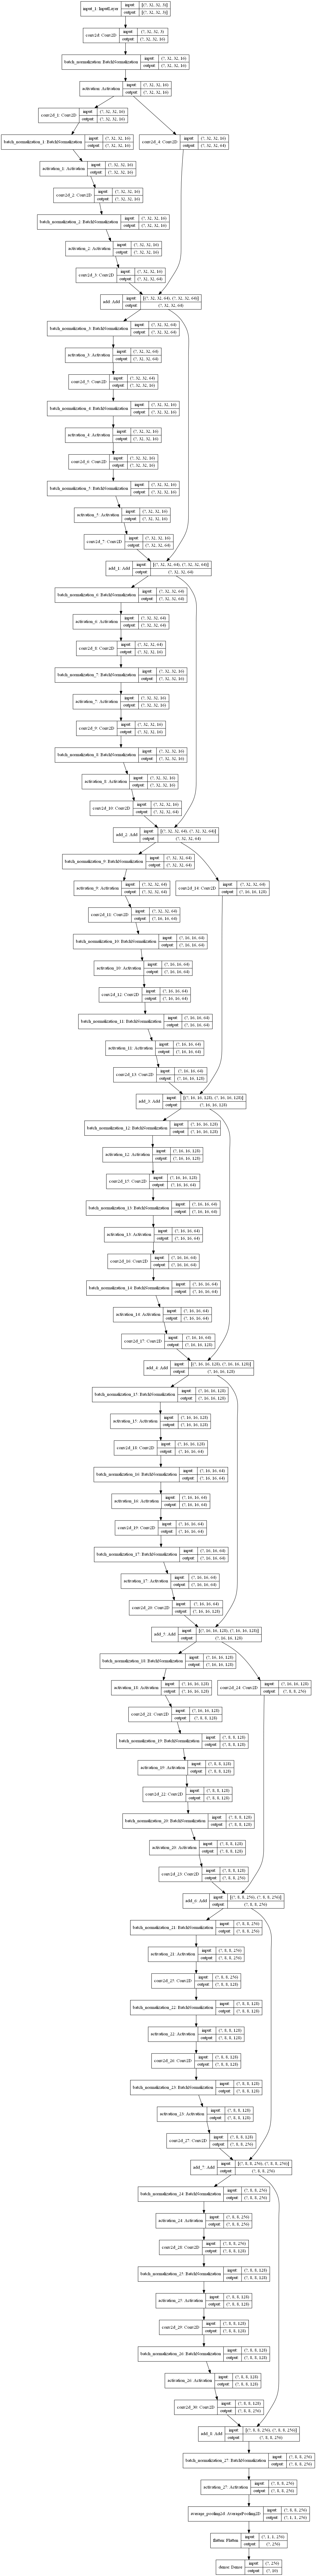

In [10]:
deep_learning.show_architecture(model,'cnn-y-network.png')

# data augmentation

In [6]:
datagen = deep_learning.simple_image_generator(x_train)

Using real-time data augmentation


In [ ]:
# image generator

datagen = deep_learning.simple_image_generator(x_train)

# Training

In [16]:
steps_per_epoch =  math.ceil(len(x_train) / batch_size)
# fit the model on the batches generated by datagen.flow().
history = model.fit(x=datagen.flow(x_train, y_train, batch_size=batch_size),
          verbose=1,
          epochs=epochs,
          validation_data=(x_test, y_test),
          steps_per_epoch=steps_per_epoch,
          callbacks=callback)

2021-05-30 18:57:26,113 [2720] WARNING  tensorflow:1091: [JupyterRequire] sample_weight modes were coerced from
  ...
    to  
  ['...']


Train for 1563 steps, validate on 10000 samples
Learning rate:  0.001
Epoch 1/200
1562/1563 [============================>.] - ETA: 0s - loss: 1.8245 - accuracy: 0.4990
Epoch 00001: val_accuracy improved from -inf to 0.53490, saving model to E:\gitlab\machine-learning\CNN\saved_models\cifar10_ResNet29v2_model.001.h5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.8244 - accuracy: 0.4990 - val_loss: 1.6717 - val_accuracy: 0.5349
Learning rate:  0.001
Epoch 2/200
1562/1563 [============================>.] - ETA: 0s - loss: 1.3656 - accuracy: 0.6236
Epoch 00002: val_accuracy improved from 0.53490 to 0.65700, saving model to E:\gitlab\machine-learning\CNN\saved_models\cifar10_ResNet29v2_model.002.h5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.3655 - accuracy: 0.6237 - val_loss: 1.2917 - val_accuracy: 0.6570
Learning rate:  0.001
Epoch 3/200
1562/1563 [============================>.] - ETA: 0s - loss: 1.1887 - accuracy: 0.6789 ETA: 0s - loss: 1

2021-05-30 19:08:00,910 [2720] WARNING  tensorflow:1018: [JupyterRequire] Can save best model only with val_accuracy available, skipping.
2021-05-30 19:08:00,917 [2720] WARNING  tensorflow:1934: [JupyterRequire] Reduce LR on plateau conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy,lr


KeyboardInterrupt: 

# Visual accuracy

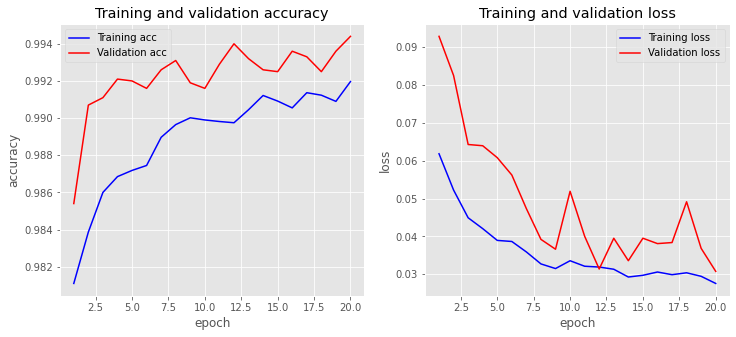

In [25]:
visual.plot_nn(history)

# evaluation at test dataset

In [26]:
# model accuracy on test dataset
score = model.evaluate([x_test, x_test],
                       y_test,
                       batch_size=batch_size,
                       verbose=0)

In [28]:
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Test accuracy: 99.4%


In [60]:
labels = [0,1,2,3,4,5,6,7,8,9]

10000/10000 [==============================] - 2s 154us/sample
comfusion matrix = 
[[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1133    1    1    0    0    0    0    0    0]
 [   1    1 1020    1    0    0    0    6    2    1]
 [   0    0    0 1007    0    2    0    0    1    0]
 [   0    0    0    0  980    0    0    0    0    2]
 [   1    0    0    3    0  886    1    0    0    1]
 [   3    6    0    0    0    0  947    0    2    0]
 [   0    3    2    0    0    0    0 1023    0    0]
 [   1    0    0    0    1    1    0    0  970    1]
 [   0    1    0    0    4    3    0    2    1  998]]

accuracy_score =  0.9944
balanced_accuracy_score =  0.9944

precision score =  0.9944
recall score =  0.9944
fp= [ 6. 11.  3.  5.  5.  6.  1.  8.  6.  5.]
fn= [ 0.  2. 12.  3.  2.  6. 11.  5.  4. 11.]
tp= [ 980. 1133. 1020. 1007.  980.  886.  947. 1023.  970.  998.]
tn= [9014. 8854. 8965. 8985. 9013. 9102. 9041. 8964. 9020. 8986.]

F1 score =  0.9944
F2 score =  [0.9951 0.9919 0.995

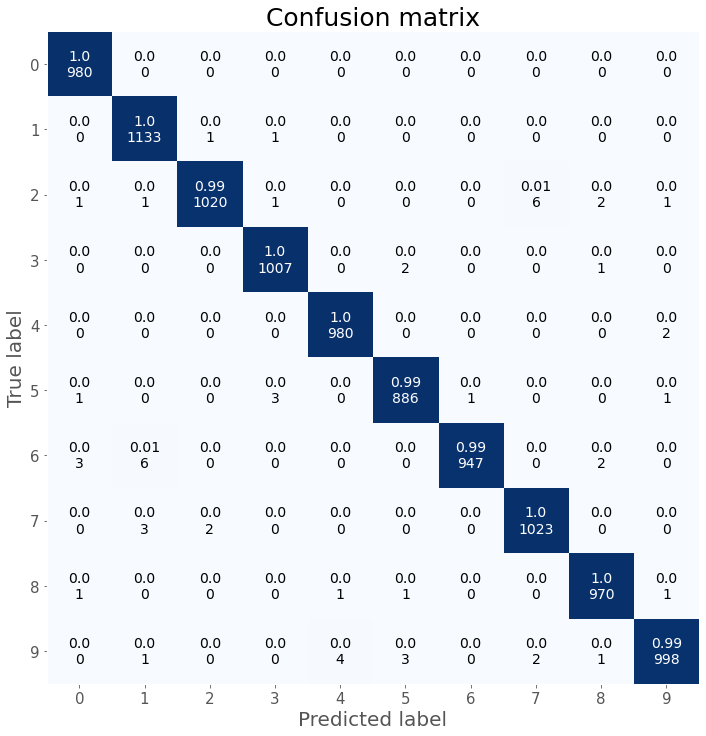


time span=  0:00:01.565998


In [64]:
y_test,yhat_classes_conv,yhat_probs = deep_learning.predict_model(model,[x_test, x_test],y_test,'multi','ovo',labels)